# Character Level Language Model

65 million years ago dinosaurs existed on Earth, and now they are back. Leading biology researchers are creating new breeds of dinosaurs and bringing them to life, our job is to give names to these new dinosaurs.

<table>
<td>
<img src="deep_learing_class/images/dinos.png" style="width:250;height:300px;">

</td>

</table>

Using a list of current dinosaur names, we will build a neural network to create new dinosaur names. The long short-term memory (LSTM) algorithm will learn the different name patterns, and randomly generate new names. Hopefully, the new names will not make any of the dinosaurs' angry with us! 

In [2]:
# import our libraries
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, LSTM, Dense, Dropout, Bidirectional
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.utils import np_utils

import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

In [3]:
# load the data & convert the text to lower case
data = open('data/dinos.txt', 'r').read()
data= data.lower()
# review the data
chars = list(set(data))
print("Here is list of unique characters: \n" + str(chars))
n_chars, n_vocab = len(data), len(chars)
print("Total characters: ", n_chars)
print("Total vocabulary: ", n_vocab)

Here is list of unique characters: 
['p', 'x', 'g', 'j', 'm', 'f', 'l', 'w', 'd', 'r', 'a', 'y', 'z', 'h', 'c', 't', 'e', 'i', 'b', 'k', 'v', 'q', 'o', 'n', '\n', 'u', 's']
Total characters:  19910
Total vocabulary:  27


In [4]:
# create python dictionaries mapping chars-to-integers and integers-to-chars
char_to_ix = { ch:i for i,ch in enumerate(sorted(chars)) }
ix_to_char = { i:ch for i,ch in enumerate(sorted(chars)) }
print(ix_to_char)
print("-----------")
print(char_to_ix)

{0: '\n', 1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z'}
-----------
{'\n': 0, 'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26}


In [5]:
# Build list of all dinosaur names (aka training examples).
with open("data/dinos.txt") as f:
    examples = f.readlines()
examples = [x.lower().strip() for x in examples]
print("A sample name:", examples[25])

A sample name: aetonyxafromimus


In [6]:
# determine the average word length of a dinosaur name
avg = sum(len(word) for word in examples) / len(examples)
print("Average word length:", avg)
long = max(examples, key=len)
print("Longest word:", long)
print("Longest word length:", len(long))

Average word length: 11.962239583333334
Longest word: lisboasaurusliubangosaurus
Longest word length: 26


In [7]:
# create the training dataset of input / output pairs encoded as integers
seq_length = 60
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
    seq_in = data[i:i + seq_length]
    seq_out = data[i + seq_length]
    dataX.append([char_to_ix[char] for char in seq_in])
    dataY.append(char_to_ix[seq_out])
n_patterns = len(dataX)
print("Total Patterns: ", n_patterns)

Total Patterns:  19850


In [8]:
# reshape input to [samples, time steps, features] for the LSTM cells
X = np.reshape(dataX, (n_patterns, seq_length, 1))
print("Input shape:", X.shape)
# normalize the data
X = X / float(n_vocab)
# one-hot encode the output variable
y = np_utils.to_categorical(dataY)
print("Output shape:", y.shape)

Input shape: (19850, 60, 1)
Output shape: (19850, 27)


In [9]:
# define the LSTM model
def lstm_model(X, y):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(128, return_sequences=True)(inputs)
    L2 = LSTM(128, return_sequences=False)(L1)
    D1 = Dropout(0.25)(L2)  
    output = Dense(y.shape[1], activation='softmax')(D1)
    model = Model(inputs=inputs, outputs=output)
    return model    

In [10]:
# create the LSTM model
model = lstm_model(X, y)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 60, 1)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 128)           66560     
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 27)                3483      
Total params: 201,627
Trainable params: 201,627
Non-trainable params: 0
_________________________________________________________________


In [11]:
# fit the model
nb_epochs = 200
history = model.fit(X, y, epochs=nb_epochs, batch_size=32, shuffle=True).history

Epoch 1/200
19850/19850 [==============================] - 76s 4ms/step - loss: 2.7977 - acc: 0.1331
Epoch 2/200
19850/19850 [==============================] - 73s 4ms/step - loss: 2.5275 - acc: 0.2517
Epoch 3/200
19850/19850 [==============================] - 73s 4ms/step - loss: 2.3570 - acc: 0.3111
Epoch 4/200
19850/19850 [==============================] - 73s 4ms/step - loss: 2.2948 - acc: 0.3262
Epoch 5/200
19850/19850 [==============================] - 73s 4ms/step - loss: 2.2457 - acc: 0.3376
Epoch 6/200
19850/19850 [==============================] - 73s 4ms/step - loss: 2.2017 - acc: 0.3502
Epoch 7/200
19850/19850 [==============================] - 73s 4ms/step - loss: 2.1532 - acc: 0.3689
Epoch 8/200
19850/19850 [==============================] - 75s 4ms/step - loss: 2.1165 - acc: 0.3826
Epoch 9/200
19850/19850 [==============================] - 73s 4ms/step - loss: 2.0682 - acc: 0.3940
Epoch 10/200
19850/19850 [==============================] - 73s 4ms/step - loss: 2.0159 - a

19850/19850 [==============================] - 32s 2ms/step - loss: 0.1882 - acc: 0.9379
Epoch 161/200
19850/19850 [==============================] - 32s 2ms/step - loss: 0.2014 - acc: 0.9325
Epoch 162/200
19850/19850 [==============================] - 32s 2ms/step - loss: 0.2054 - acc: 0.9320
Epoch 163/200
19850/19850 [==============================] - 32s 2ms/step - loss: 0.2008 - acc: 0.9317
Epoch 164/200
19850/19850 [==============================] - 32s 2ms/step - loss: 0.1896 - acc: 0.9362
Epoch 165/200
19850/19850 [==============================] - 32s 2ms/step - loss: 0.2064 - acc: 0.9316
Epoch 166/200
19850/19850 [==============================] - 32s 2ms/step - loss: 0.1827 - acc: 0.9381
Epoch 167/200
19850/19850 [==============================] - 32s 2ms/step - loss: 0.2136 - acc: 0.9291
Epoch 168/200
19850/19850 [==============================] - 32s 2ms/step - loss: 0.2050 - acc: 0.9296
Epoch 169/200
19850/19850 [==============================] - 32s 2ms/step - loss: 0.173

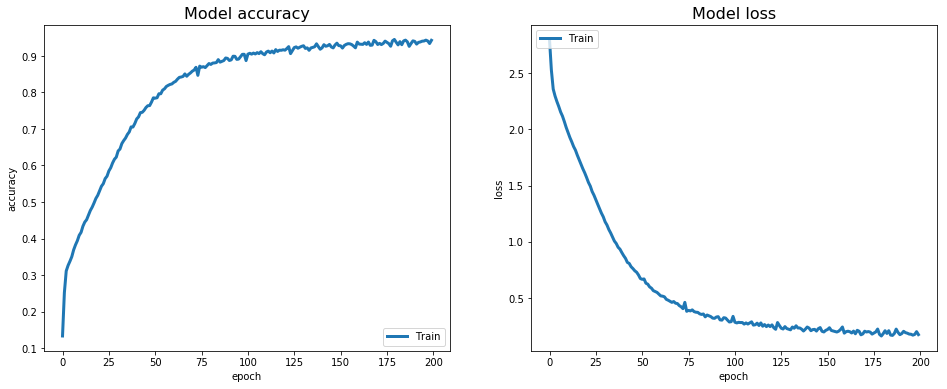

In [12]:
# plot the model loss and accuracy
fig, (axis1, axis2) = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

# summarize history for accuracy
axis1.plot(history['acc'], label='Train', linewidth=3)
axis1.set_title('Model accuracy', fontsize=16)
axis1.set_ylabel('accuracy')
axis1.set_xlabel('epoch')
axis1.legend(loc='lower right')

# summarize history for loss
axis2.plot(history['loss'], label='Train', linewidth=3)
axis2.set_title('Model loss', fontsize=16)
axis2.set_ylabel('loss')
axis2.set_xlabel('epoch')
axis2.legend(loc='upper left')
plt.show()

In [13]:
# pick a random starting sequence as your seed sequence
start = np.random.randint(0, len(dataX)-1)
seed = dataX[start]
print("Seed:")
print("\"",''.join([ix_to_char[value] for value in seed]),"\"")

Seed:
" eyawati
jianchangosaurus
jiangjunmiaosaurus
jiangjunosaurus
 "


In [14]:
# generate new dinosaur names
for i in range(1200):
    x = np.reshape(seed, (1, len(seed), 1))
    x = x / float(n_vocab)
    prediction = model.predict(x)
    index = np.argmax(prediction)
    result = ix_to_char[index]
    seq_in = [ix_to_char[value] for value in seed]
    sys.stdout.write(result)
    seed.append(index)
    seed = seed[1:len(seed)]
print("\n Done")

jiangshanosaurus
jiangxisaurus
jianianhualong
jinfengopteryx
jingshanosaurus
jintasaurus
jinzhnusaurus
jiutaisaurus
jobaria
jubbulpuria
judiceratops
jurapteryx
jurassosaurus
juratyrant
juravenator
kagasaurus
kaijiangia
majnsaurus
kaglapcurosaurus
lanacisataurus
lamtsuchus
laiyangosaurus
lamusposaurus
kartentasaura
latenivenatrix
latirhinus
leaellynasaura
leinkusaus
leiiisaurus
lenurosaurus
kerberosaurus
kesedrosaurus
keseerosaurus
keseerosaurus
kesadrosaurus
kentrosaurus
khaan
keetrossosaurus
mengocrn
signotosaurus
mentosaptor
mertinsaptor
neuquensaurus
nattrrsaurus
narshsaurus
nartossosaurus
maronssaualarosaurus
naramauenatitan
nasutoceratops
natronasaurus
nebulasaurus
nictia
raiolocosaurus
nictosaurus
nicroconlodus
liloernaeln
urus
uienyanoong
qinjnane
vilcena
tasisaurus
tarootesantoraurus
raptosex
ratchasimasaurus
rativates
rayososaurus
razanandrongobe
rebbachisaurus
regaliceratops
regnosaurus
revueltosaurus
thabdodon
rhadinosaurus
rhinorex
rhodanosaurus
rhoetosaurus
rhopalodon
riab